In [1]:
import numpy as np
from csaps import csaps
from scipy import integrate

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data0 = np.loadtxt(open("./Tokyo.csv","rb"),delimiter=",",skiprows=0) 

In [3]:
Vx = data0[:,0]
Cd = data0[:,1]
dpsi = data0[:,2]
Dl = data0[:,3]
Dr = data0[:,4]
x1 = data0[:,5]
y1 = data0[:,6]
z1 = data0[:,7]
rt2 = data0[:,9]
lap_count = data0[:,11]

index = (lap_count == 2)

In [4]:
modified_angle = rt2 - dpsi

Cp_X = x1 - Cd*np.cos(modified_angle)
Cp_Y = z1 + Cd*np.sin(modified_angle)
Lp_X = x1 - Dl*np.cos(modified_angle)
Lp_Y = z1 + Dl*np.sin(modified_angle)
Rp_X = x1 + Dr*np.cos(modified_angle)
Rp_Y = z1 - Dr*np.sin(modified_angle)

Center_X = np.hstack((Cp_X[index], Cp_X[index][0]))
Center_Y = np.hstack((Cp_Y[index], Cp_Y[index][0]))
Left_X = np.hstack((Lp_X[index], Lp_X[index][0]))
Left_Y = np.hstack((Lp_Y[index], Lp_Y[index][0]))
Right_X = np.hstack((Rp_X[index], Rp_X[index][0]))
Right_Y = np.hstack((Rp_Y[index], Rp_Y[index][0]))

In [8]:
def make_smooth(X,Y, weights, smooth):
    length = np.arange(X.shape[0])
    pp = csaps(length, np.vstack((X,Y)), weights = weights*np.ones(X.shape[0]), smooth = smooth, )
    
    v = pp(length)
    dv = pp(length, 1)
    d2v = pp(length, 2)
    X = v[0,:]
    Y = v[1,:]
    dX = dv[0,:]
    dY = dv[1,:]
    d2X = d2v[0,:]
    d2Y = d2v[1,:]
    
    psi = np.arctan2(dY,dX)
    kap = (dX*d2Y -dY*d2X)/(dX**2 + dY**2)**1.5
    ds = np.sqrt(dX**2 + dY**2)
    s = integrate.cumtrapz(ds, initial = 0)
    
    return X,Y

In [9]:
X2,Y2=make_smooth(Center_X,Center_Y, 0.4, 1e-7)

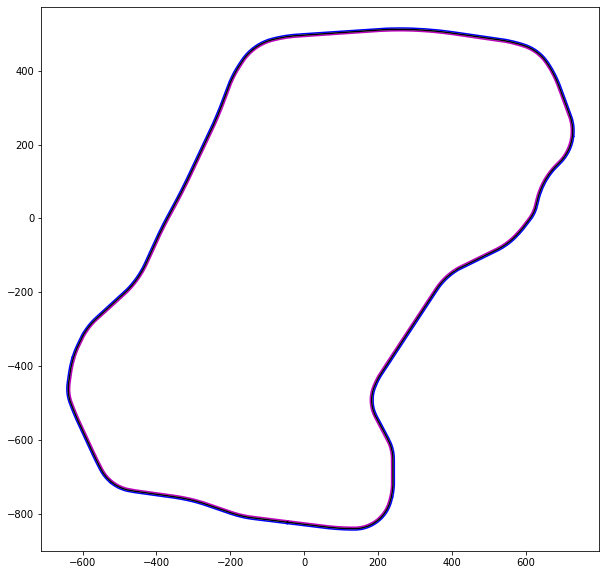

In [7]:
plt.figure(figsize=(10,10))
# plt.plot(Left_X,Left_Y,'b')
# plt.plot(Right_X, Right_Y,'m')
plt.plot(Center_X, Center_Y,'k')
plt.axis('equal')

plt.savefig('p.svg',format = 'svg')